In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mab as mab

In [2]:
np.random.seed(1)
num_arms = 10
bandit_10_arm = mab.BernoulliBandit(num_arms)
print("Generate Bernoulli Bandit with %d arms" % num_arms)
print("The index of the best arm is %d, and the winning rate is %.4f" %
      (bandit_10_arm.best_idx, bandit_10_arm.best_prob))

Generate Bernoulli Bandit with 10 arms
The index of the best arm is 1, and the winning rate is 0.7203


epsilon-greedy algorithm accumulated regret:  25.526630933945313


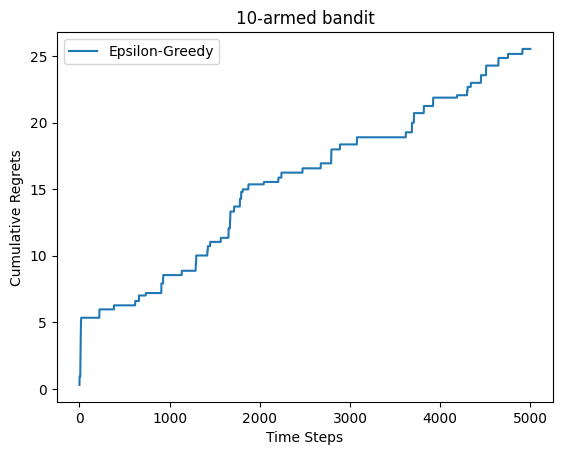

In [4]:
np.random.seed(1)
epsilon_greedy_solver = mab.EpsilonGreedy(bandit_10_arm, epsilon=0.01)
epsilon_greedy_solver.run(num_steps=5000)
print('epsilon-greedy algorithm accumulated regret: ', epsilon_greedy_solver.regret)
plotter = mab.Plotter([epsilon_greedy_solver], ["Epsilon-Greedy"])
plotter.plot_results()

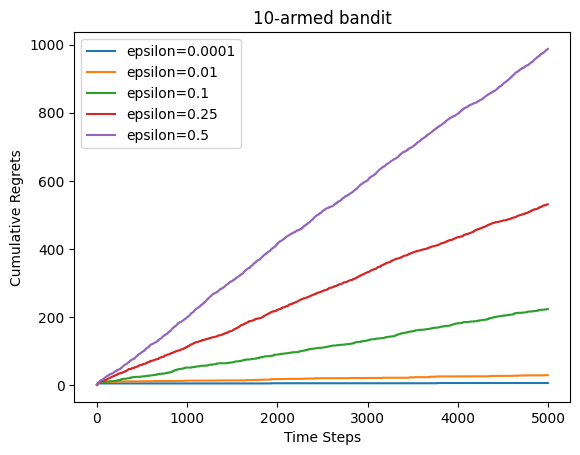

In [5]:
np.random.seed(0)
epsilons = [1e-4, 0.01, 0.1, 0.25, 0.5]
epsilon_greedy_solver_list = [
    mab.EpsilonGreedy(bandit_10_arm, epsilon=e) for e in epsilons
]
epsilon_greedy_solver_names = ["epsilon={}".format(e) for e in epsilons]
for solver in epsilon_greedy_solver_list:
    solver.run(num_steps=5000)
plotter = mab.Plotter(epsilon_greedy_solver_list, epsilon_greedy_solver_names)
plotter.plot_results()

cumulative regret of decaying epsilon-greedy algorithm:  10.114334931260183


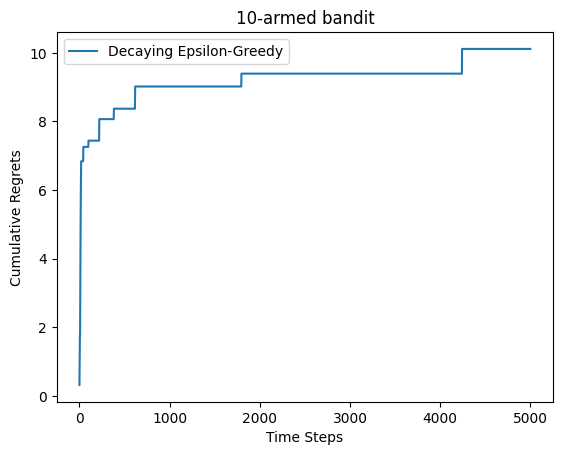

In [7]:
np.random.seed(1)
decaying_epsilon_greedy_solver = mab.DecayingEpsilonGreedy(bandit_10_arm)
decaying_epsilon_greedy_solver.run(num_steps=5000)
print('cumulative regret of decaying epsilon-greedy algorithm: ', decaying_epsilon_greedy_solver.regret)
plotter = mab.Plotter([decaying_epsilon_greedy_solver], ["Decaying Epsilon-Greedy"])
plotter.plot_results()

cumulative regret of UCB algorithm:  70.45281214197854


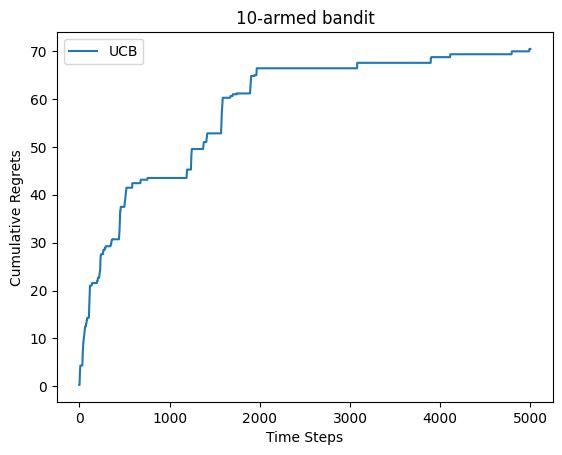

In [3]:
np.random.seed(1)
coef = 1
UCB_solver = mab.UCB(bandit_10_arm, coef=coef)
UCB_solver.run(num_steps=5000)
print('cumulative regret of UCB algorithm: ', UCB_solver.regret)
plotter = mab.Plotter([UCB_solver], ["UCB"])
plotter.plot_results()

cumulative regret of Thompson Sampling algorithm:  57.19161964443925


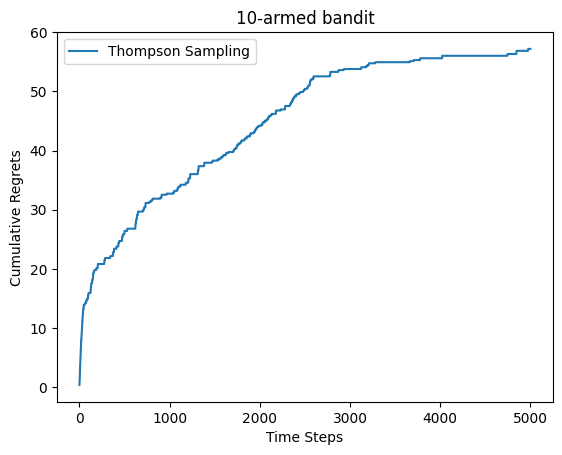

In [3]:
np.random.seed(1)
thompson_sampling_solver = mab.ThompsonSampling(bandit_10_arm)
thompson_sampling_solver.run(num_steps=5000)
print('cumulative regret of Thompson Sampling algorithm: ', thompson_sampling_solver.regret)
plotter = mab.Plotter([thompson_sampling_solver], ["Thompson Sampling"])
plotter.plot_results()